# The Moran Process with the Axelrod library

The [Moran process](https://en.wikipedia.org/wiki/Moran_process) is a common population model of natural selection. With the wealth of strategies in the [axelrod library](https://github.com/Axelrod-Python), implementing a Moran process is simple.

The basic idea of the model is that we have a population of $N$ individuals. The population size is fixed throughout. Each round every player interacts with every other player, in this case the default game in the axelrod library, the [prisoner's dilemma](https://en.wikipedia.org/wiki/Prisoner's_dilemma).

After the scores are summed for each player, we choose one to reproduce proportionally to its score ([fitness proportionate selection](https://en.wikipedia.org/wiki/Fitness_proportionate_selection)). We also choose one player to replace, at random uniformly. The process continues until the population consists of a single type ([fixation](https://en.wikipedia.org/wiki/Fixation_%28population_genetics%29)).

The Moran process is natively supported in the axelrod library.

In [1]:
%matplotlib inline
import itertools
import random

import matplotlib.pyplot as plt
import axelrod as axl
plt.rcParams['figure.figsize'] = (10, 10)

## Moran Proccesses

Let's create a population of players and run the population dynamic.

In [2]:
# Create a population of size 30
N = 20
players = []
for _ in range(N):
    player = random.choice(axl.basic_strategies)
    players.append(player())

# Run the process. Eventually there will be only
# one player type left.
mp = axl.MoranProcess(players=players, turns=200)
mp.play()
print("The winner is:", mp.winning_strategy_name)

The winner is: Tit For Tat


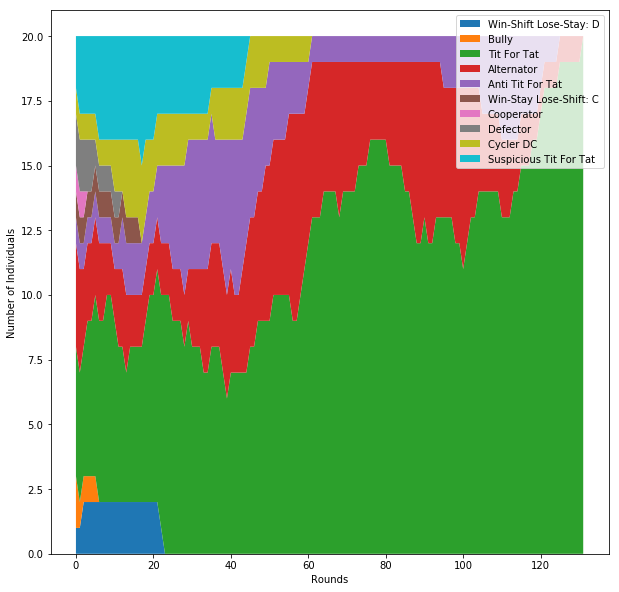

In [3]:
# Plot the results

player_names = mp.populations[0].keys()

plot_data = []
labels = []
for name in player_names:
    labels.append(name)
    values = [counter[name] for counter in mp.populations]
    plot_data.append(values)
    domain = range(len(values))

plt.stackplot(domain, plot_data, labels=labels)
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("Number of Individuals")
plt.show()

## With Mutation

We can also run a population with mutation. It will never converge so we need to limit the number of rounds.

In [4]:
# Create a population of size 30
N = 25
players = []
for _ in range(N):
    player = random.choice([axl.TitForTat, axl.Cooperator, axl.Defector])
    players.append(player())

rounds = 1000
mp = axl.MoranProcess(players=players, turns=200, mutation_rate=0.05)
list(itertools.islice(mp, rounds))
print("Completed {} rounds.".format(rounds))

Completed 1000 rounds.


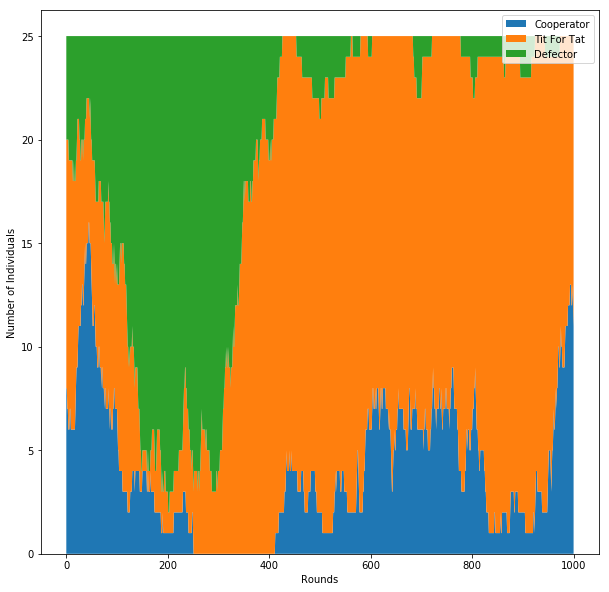

In [5]:
# Plot the results

player_names = mp.populations[0].keys()

plot_data = []
labels = []
for name in player_names:
    labels.append(name)
    values = [counter[name] for counter in mp.populations]
    plot_data.append(values)
    domain = range(len(values))

plt.stackplot(domain, plot_data, labels=labels)
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("Number of Individuals")
plt.show()